Import necessary libraries

In [5]:
!pip install gensim
import numpy as np
import gensim
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Definitions:

    Skip-Gram: A neural network-based model that learns word embeddings by predicting context words from a target word.
    Negative Sampling: A method to approximate Softmax by sampling negative examples, reducing computation cost.
    Contrastive Estimation (NCE Loss): A technique where the model differentiates real words from noise samples, improving efficiency.
    Hierarchical Softmax: A method that organizes words in a binary tree, reducing Softmax complexity.
    PCA (Principal Component Analysis): A dimensionality reduction technique that transforms high-dimensional data into fewer dimensions.
    t-SNE (t-Distributed Stochastic Neighbor Embedding): A nonlinear dimensionality reduction technique optimized for visualization.


Sample corpus for training (can be replaced with a larger dataset)

In [6]:
sentences = [
    ['the', 'cat', 'sat', 'on', 'the', 'mat'],
    ['the', 'dog', 'barked', 'at', 'the', 'cat'],
    ['the', 'bird', 'flew', 'over', 'the', 'tree'],
    ['the', 'fish', 'swam', 'in', 'the', 'pond'],
    ['the', 'sun', 'shines', 'bright', 'in', 'the', 'sky'],
    ['a', 'man', 'reads', 'a', 'book', 'in', 'the', 'library'],
    ['a', 'woman', 'drinks', 'coffee', 'at', 'the', 'cafe'],
    ['students', 'study', 'hard', 'for', 'the', 'exam'],
    ['the', 'train', 'arrived', 'at', 'the', 'station'],
    ['children', 'play', 'happily', 'in', 'the', 'park'],
    ['a', 'teacher', 'teaches', 'students', 'in', 'the', 'classroom'],
    ['the', 'doctor', 'treats', 'patients', 'at', 'the', 'hospital'],
    ['the', 'farmer', 'grows', 'crops', 'in', 'the', 'field'],
    ['the', 'chef', 'cooks', 'delicious', 'food', 'in', 'the', 'kitchen']
]

Training Skip-Gram model with three solutions

In [7]:
# Solution 1: Negative Sampling
model_negative_sampling = Word2Vec(sentences, vector_size=50, window=3, sg=1, negative=5, hs=0, min_count=1)

# Solution 2: Contrastive Estimation (Noise Contrastive Estimation - NCE loss)
model_nce = Word2Vec(sentences, vector_size=50, window=3, sg=1, ns_exponent=0.75, hs=0, min_count=1)

# Solution 3: Hierarchical Softmax
model_hierarchical_softmax = Word2Vec(sentences, vector_size=50, window=3, sg=1, hs=1, negative=0, min_count=1)

Function to visualize embeddings

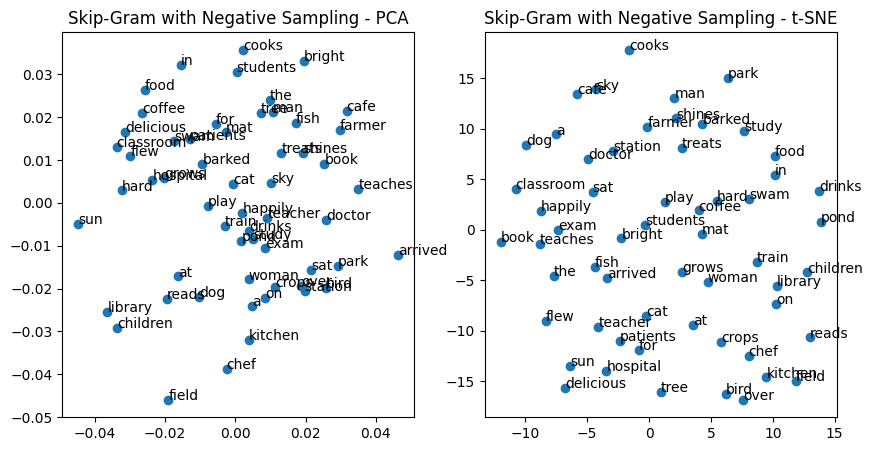

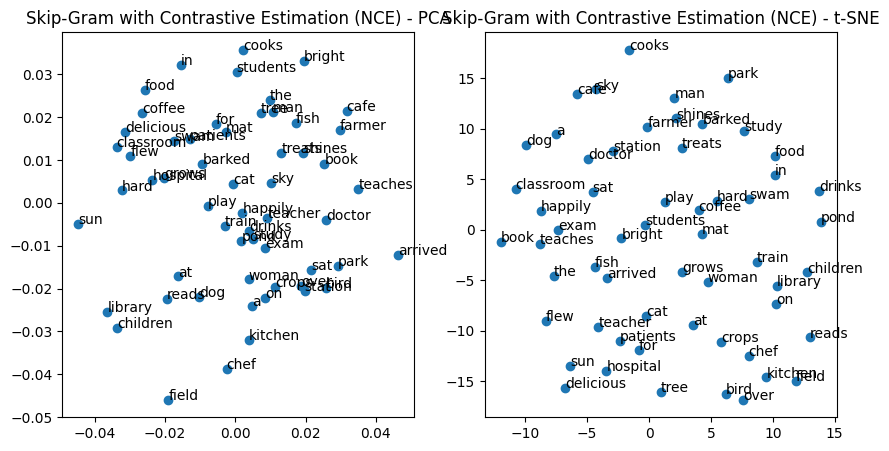

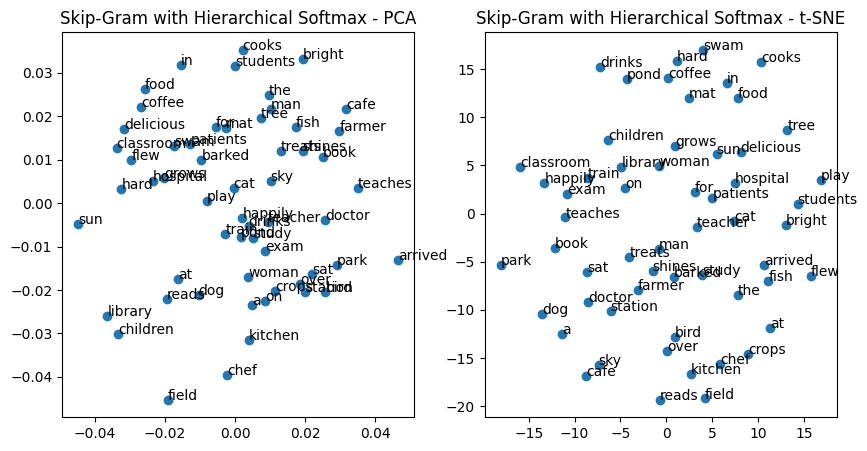

In [8]:
# Function to visualize embeddings
def visualize_embeddings(model, title):
    words = list(model.wv.index_to_key)
    vectors = np.array([model.wv[word] for word in words])

    # Ensure there are enough points for t-SNE
    if len(words) < 3:
        print(f"Not enough words to visualize for {title}")
        return

    # Reduce dimensions using PCA
    pca = PCA(n_components=2)
    reduced_vectors_pca = pca.fit_transform(vectors)

    # Adjust perplexity to be less than the number of words
    perplexity_value = min(10, len(words) - 1)

    # Reduce dimensions using t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
    reduced_vectors_tsne = tsne.fit_transform(vectors)

    # Plot PCA visualization
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(reduced_vectors_pca[:, 0], reduced_vectors_pca[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, (reduced_vectors_pca[i, 0], reduced_vectors_pca[i, 1]))
    plt.title(f'{title} - PCA')

    # Plot t-SNE visualization
    plt.subplot(1, 2, 2)
    plt.scatter(reduced_vectors_tsne[:, 0], reduced_vectors_tsne[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, (reduced_vectors_tsne[i, 0], reduced_vectors_tsne[i, 1]))
    plt.title(f'{title} - t-SNE')

    plt.show()

# Visualizing results
visualize_embeddings(model_negative_sampling, 'Skip-Gram with Negative Sampling')
visualize_embeddings(model_nce, 'Skip-Gram with Contrastive Estimation (NCE)')
visualize_embeddings(model_hierarchical_softmax, 'Skip-Gram with Hierarchical Softmax')